In [2]:
#importing required libraries

from sympy import *
import pylab as p
import numpy as np
import scipy.signal as sp

In [3]:
#defining a lowpass filter circuit

def lowpass(R1, R2, C1, C2, G, Vi):
    s = symbols('s')      #defining a symbol to be used throughout
    A = Matrix([[0, 0, 1, -1/G], [1/(1 + s*R2*C2), 1, 0, 0], [0, -G, G, 1], [-1/R1-1/R2-s*C1, 1/R2, 0, s*C1]])   #coefficient matrix
    b = Matrix([0, 0, 0, -Vi/R1])      #constant matrix
    V = A.inv() * b                    #solving the matrix
    return A, b, V                     #returning all the computed matrices

0.0001586/((1.0e-5*s + 1)*(-2.0e-9*s - 1.586e-9*s/(1.0e-5*s + 1) - 0.0004 - 0.0002/(1.0e-5*s + 1)))


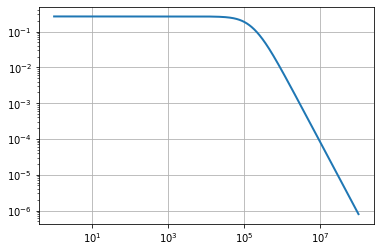

In [4]:
A, b, V = lowpass(10000, 10000, 1e-9, 1e-9, 1.586, 1)      #assigning values to the lowpass filter components
s = symbols('s')
Vo = V[3]   #output is the 4th element of the matrix
print(Vo)
ww = p.logspace(0, 8, 801)  #defining frequencies for bode plot
ss = 1j * ww                #defining s for bode plot
hf = lambdify(s, Vo, 'numpy')  #creating a function for Bode plot
v = hf(ss)                   #y-axis values for bode plot
p.loglog(ww, abs(v), lw=2)   #plotting Bode plot as a loglog function
p.grid(True)
p.show()

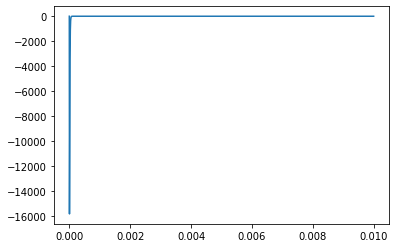

In [6]:
#converting s-domain function to num, den form

H = V[3]
H1 = expand(simplify(H))
n, d = fraction(H1)
n, d = Poly(n, s), Poly(d, s)
num, den = n.all_coeffs(), d.all_coeffs()
num, den = [float(f) for f in num], [float(f) for f in den]

H = sp.lti(num, den)    #transfer function to use signals toolbox
t = np.arange(0, 1e-2, 1e-6)  #time vector
t, h = sp.impulse(H, None, t) #inverse Laplace for time domain transfer function
p.plot(t,h)   #plotting time-domain transfer function

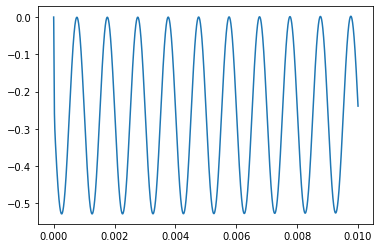

In [7]:
H = sp.lti(num, den)
pi = 3.1416
t = np.arange(0, 1e-2, 1e-6)
vi = np.sin(2000 * pi * t) + np.cos(2e6 * pi * t)  #low frequency + high frequency sinusoid
t, y, svec = sp.lsim(H, vi, t)                     #time domain output function
p.plot(t, y)                                       #plotting time domain output

In [6]:
#defining a highpass filter

s = symbols('s')
def highpass(C1, C2, R1, R3, G, Vi):
    A = Matrix([[0, 0, 1, -1/G], [-s*R3*C2/(1 + s*R3*C2), 1, 0, 0], [0, -G, G, 1], [-s*C1-s*C2-1/R1, s*C2, 0, 1/R1]])
    b = Matrix([0, 0, 0, -s*Vi*C1])
    V = A.inv() * b
    return A, b, V

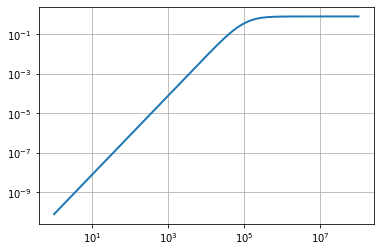

In [7]:
A, b, V = highpass(1e-9, 1e-9, 1e4, 1e4, 1.586, 1)  #defining values for highpass filter transfer function
#using same algorithm as before to plot Bode plot of transfer function
s = symbols('s')
Vo = V[3]
ww = p.logspace(0, 8, 801)
ss = 1j * ww
hf = lambdify(s, Vo, 'numpy')
v = hf(ss)
p.loglog(ww, abs(v), lw=2)
p.grid(True)
p.show()

In [8]:
#transfer function in num,den form

H = V[3]
H1 = expand(simplify(H))
n, d = fraction(H1)
n, d = Poly(n, s), Poly(d, s)
num, den = n.all_coeffs(), d.all_coeffs()
num, den = [float(f) for f in num], [float(f) for f in den]

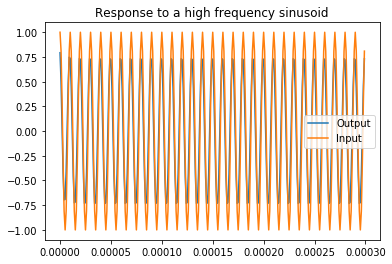

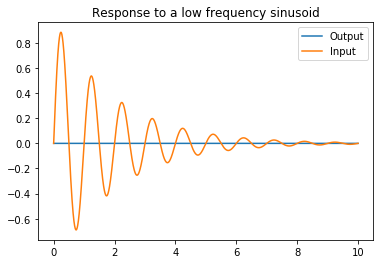

In [9]:
H = sp.lti(num, den)    #defining transfer function to use signals tooo=lbox
t = np.arange(0, 3e-4, 1e-6)  #time vector
vi = np.cos(2e5 * pi * t) * np.exp(-0.5 * t) #high frequency decaying exponential
t, y, svec = sp.lsim(H, vi, t)               #time domain output function
p.plot(t, y, label = "Output")    #plotting output in time domain
p.plot(t, vi, label = "Input")    #plotting input in time domain
p.legend()                        #legend
p.title("Response to a high frequency sinusoid")  #title
p.show()                          #showing the graph

t = np.arange(0, 10, 1e-3)        #time evctor for low frequency decaying sinusoid
vi = np.sin(2 * pi * t) * np.exp(-0.5 * t)   #time domain input for low frequency decaying sinusoid
t, y, svec = sp.lsim(H, vi, t)           #time domain output function
#plotting the inout and output for low frequency decaying sinusoid
p.plot(t, y, label = "Output")
p.plot(t, vi, label = "Input")
p.legend()
p.title("Response to a low frequency sinusoid")
p.show()

In [10]:
A, b, V = highpass(1e-9, 1e-9, 1e4, 1e4, 1.586, 1/s)   #step response in s-domain

In [11]:
#converting step response to num,den form to use signals toolbox
H = V[3]
H1 = expand(simplify(H))
n, d = fraction(H1)
n, d = Poly(n, s), Poly(d, s)
num, den = n.all_coeffs(), d.all_coeffs()
num, den = [float(f) for f in num], [float(f) for f in den]

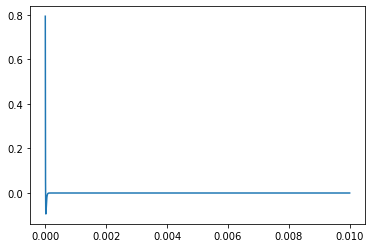

In [12]:
S = sp.lti(num, den)   #step response
t = np.arange(0, 1e-2, 1e-6)  #time vector
t, step_resp = sp.impulse(S, None, t)  #inverse Laplace for time domain step response
p.plot(t, step_resp)    #plotting step response